# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

639

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
print ('Beginning Data Retrieval')
print ('-----------------------------')

# Create empty lists of our variables
cityList = []
cloudinessList = []
countryList = [] 
dateList = []
humidityList = []
latList = [] 
lngList = [] 
maxTempList = [] 
windSpeedList = []
indexCounter = 0
setCounter = 1

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# For loop through the cities list, for each city in city list 
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        cityList.append(response["name"])
        cloudinessList.append(response['clouds']['all'])
        countryList.append(response["sys"]["country"])
        dateList.append(response["dt"])
        humidityList.append(response["main"]["humidity"])
        latList.append(response["coord"]["lat"])
        lngList.append(response["coord"]["lon"])
        maxTempList.append(response['main']['temp_max'])
        windSpeedList.append(response["wind"]["speed"])
        if indexCounter > 49:
            indexCounter = 0
            setCounter += 1
    
        else:
            indexCounter += 1
            
        print(f"Processing Record {indexCounter} of Set {setCounter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")
        
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | kiunga
Processing Record 3 of Set 1 | new norfolk
Processing Record 4 of Set 1 | axim
Processing Record 5 of Set 1 | coquimbo
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | cape town
City not found. Skipping...
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | perth
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | constitucion
Processing Record 12 of Set 1 | cabo san lucas
Processing Record 13 of Set 1 | ostrovnoy
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | khasan
Processing Record 17 of Set 1 | tingi
Processing Record 18 of Set 1 | mahebourg
City not found. Skipping...
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | stornoway
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | puerto a

Processing Record 35 of Set 4 | tianpeng
Processing Record 36 of Set 4 | bhander
Processing Record 37 of Set 4 | sur
Processing Record 38 of Set 4 | berlevag
Processing Record 39 of Set 4 | acambay
Processing Record 40 of Set 4 | lazaro cardenas
Processing Record 41 of Set 4 | saint-augustin
Processing Record 42 of Set 4 | vaitape
Processing Record 43 of Set 4 | lucapa
Processing Record 44 of Set 4 | izumo
Processing Record 45 of Set 4 | saint-francois
Processing Record 46 of Set 4 | navrongo
Processing Record 47 of Set 4 | andros town
Processing Record 48 of Set 4 | hobart
Processing Record 49 of Set 4 | cayenne
City not found. Skipping...
Processing Record 50 of Set 4 | padang
Processing Record 0 of Set 5 | coihaique
Processing Record 1 of Set 5 | moose factory
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | broken hill
Processing Record 4 of Set 5 | maumere
Processing Record 5 of Set 5 | pachperwa
Processing Record 6 of Set 5 | lata
Processing Record 7 of Set 5 |

Processing Record 23 of Set 8 | suamico
Processing Record 24 of Set 8 | wasilla
Processing Record 25 of Set 8 | pisco
City not found. Skipping...
Processing Record 26 of Set 8 | chirongui
Processing Record 27 of Set 8 | huanren
Processing Record 28 of Set 8 | korem
Processing Record 29 of Set 8 | lasa
Processing Record 30 of Set 8 | qitaihe
City not found. Skipping...
Processing Record 31 of Set 8 | beroroha
Processing Record 32 of Set 8 | flin flon
City not found. Skipping...
Processing Record 33 of Set 8 | waingapu
Processing Record 34 of Set 8 | kushiro
Processing Record 35 of Set 8 | senno
Processing Record 36 of Set 8 | binzhou
Processing Record 37 of Set 8 | namibe
Processing Record 38 of Set 8 | swellendam
Processing Record 39 of Set 8 | samfya
Processing Record 40 of Set 8 | aksha
City not found. Skipping...
Processing Record 41 of Set 8 | bulgan
Processing Record 42 of Set 8 | lashio
Processing Record 43 of Set 8 | boende
Processing Record 44 of Set 8 | nouakchott
Processing R

Processing Record 2 of Set 12 | raymond
Processing Record 3 of Set 12 | marienburg
Processing Record 4 of Set 12 | havelock
Processing Record 5 of Set 12 | nemuro
Processing Record 6 of Set 12 | micheweni
City not found. Skipping...
Processing Record 7 of Set 12 | nuuk
Processing Record 8 of Set 12 | yarada
Processing Record 9 of Set 12 | pevek
City not found. Skipping...
Processing Record 10 of Set 12 | winnemucca
Processing Record 11 of Set 12 | durazno
Processing Record 12 of Set 12 | sharan
Processing Record 13 of Set 12 | hofn
Processing Record 14 of Set 12 | kamaishi
Processing Record 15 of Set 12 | carauari
Processing Record 16 of Set 12 | salaga
Processing Record 17 of Set 12 | tommot
Processing Record 18 of Set 12 | tondano
Processing Record 19 of Set 12 | bintulu
Processing Record 20 of Set 12 | vanavara
Processing Record 21 of Set 12 | toora-khem
Processing Record 22 of Set 12 | kampene
Processing Record 23 of Set 12 | semikarakorsk
Processing Record 24 of Set 12 | rabo de p

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating panda dataframe 

cityWeather_df = pd.DataFrame({"City" :cityList,
                            "Latitude" : latList,
                            "Longitude" : lngList,
                            "Max Temperature" : maxTempList,
                            "Humidity" : humidityList,
                            "Cloudiness" : cloudinessList,
                            "Wind Speed" : windSpeedList,
                            "Country" : countryList,
                            "Date" : dateList
})

# Export to CSV 
cityWeather_df.to_csv("cityWeatherOutput.csv", index = False)

# Display to dataframe 
cityWeather_df.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chui,-33.6971,-53.4616,54.50,69,100,3.53,UY,1629735059
1,Kiunga,-6.1219,141.2906,73.53,100,100,0.47,PG,1629735125
2,New Norfolk,-42.7826,147.0587,37.71,76,6,2.93,AU,1629735097
3,Esim,4.8699,-2.2405,79.93,76,72,6.69,GH,1629735125
4,Coquimbo,-29.9533,-71.3436,58.73,62,40,11.50,CL,1629735126


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# There are no cities with humidty over 100% -- The instructions indicate that we may skip this step 
# Proceed to Plotting of data 

In [6]:
#  Get the indices of cities that have humidity over 100%.
cityIndex = cityWeather_df[cityWeather_df["Humidity"] > 100].index
print(cityIndex)

Int64Index([], dtype='int64')


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cityWeather_df.drop(cityWeather_df[cityWeather_df['Humidity'] > 100].index, inplace = False)
clean_city_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chui,-33.6971,-53.4616,54.50,69,100,3.53,UY,1629735059
1,Kiunga,-6.1219,141.2906,73.53,100,100,0.47,PG,1629735125
2,New Norfolk,-42.7826,147.0587,37.71,76,6,2.93,AU,1629735097
3,Esim,4.8699,-2.2405,79.93,76,72,6.69,GH,1629735125
4,Coquimbo,-29.9533,-71.3436,58.73,62,40,11.50,CL,1629735126


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

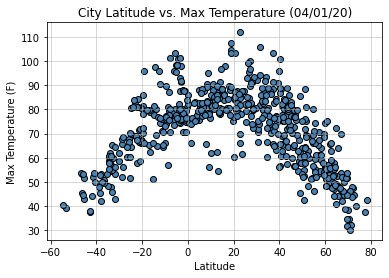

In [8]:
# Lat vs Temperature scatter Plot 

plt.scatter(cityWeather_df["Latitude"], cityWeather_df['Max Temperature'], facecolor = 'steelblue', edgecolor = 'black')

# Title 
plt.title('City Latitude vs. Max Temperature (04/01/20)')

# X-axis Lable
plt.xlabel('Latitude')

# Y-axis Lable
plt.ylabel('Max Temperature (F)')

# Grid Lines
plt.grid (linestyle = '-', linewidth = 1, alpha = .5)

# Save as png
plt.savefig("Images/LatitudevsTemp.png")

## Latitude vs. Humidity Plot

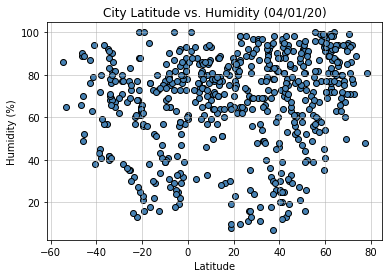

In [9]:
# Lat vs Temperature scatter Plot 

plt.scatter(cityWeather_df["Latitude"], cityWeather_df['Humidity'], facecolor = 'steelblue', edgecolor = 'black')

# Title 
plt.title('City Latitude vs. Humidity (04/01/20)')

# X-axis Lable
plt.xlabel('Latitude')

# Y-axis Lable
plt.ylabel('Humidity (%)')

# Grid Lines
plt.grid (linestyle = '-', linewidth = 1, alpha = .5)

# Save as png
plt.savefig("Images/LatitudevsHumidity.png")

## Latitude vs. Cloudiness Plot

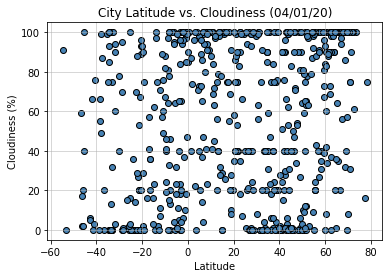

In [10]:
# Lat vs Temperature scatter Plot 

plt.scatter(cityWeather_df["Latitude"], cityWeather_df['Cloudiness'], facecolor = 'steelblue', edgecolor = 'black')

# Title 
plt.title('City Latitude vs. Cloudiness (04/01/20)')

# X-axis Lable
plt.xlabel('Latitude')

# Y-axis Lable
plt.ylabel('Cloudiness (%)')

# Grid Lines
plt.grid (linestyle = '-', linewidth = 1, alpha = .5)

# Save as png
plt.savefig("Images/LatitudevsCloudiness.png")

## Latitude vs. Wind Speed Plot

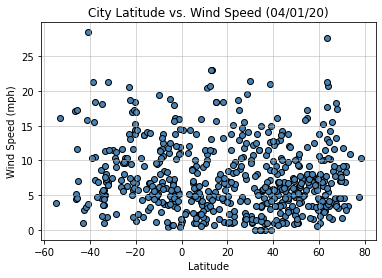

In [11]:
# Lat vs Temperature scatter Plot 

plt.scatter(cityWeather_df["Latitude"], cityWeather_df['Wind Speed'], facecolor = 'steelblue', edgecolor = 'black')

# Title 
plt.title('City Latitude vs. Wind Speed (04/01/20)')

# X-axis Lable
plt.xlabel('Latitude')

# Y-axis Lable
plt.ylabel('Wind Speed (mph)')

# Grid Lines
plt.grid (linestyle = '-', linewidth = 1, alpha = .5)

# Save as png
plt.savefig("Images/LatitudevsWindSpeed.png")

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames

northernHemisphere = cityWeather_df.loc[cityWeather_df["Latitude"] >= 0]
southernHemisphere = cityWeather_df.loc[cityWeather_df["Latitude"] < 0]

In [13]:
southernHemisphere[["Max Temperature"]]

,Max Temperature
0,54.50
1,73.53
2,37.71
4,58.73
5,48.09
...,...
557,53.40
566,76.50
571,60.75
575,98.53


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-value is: -0.73


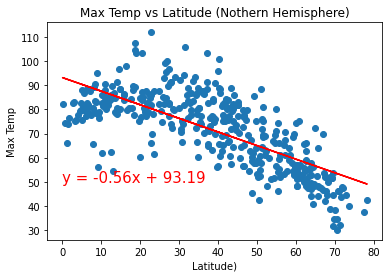

In [14]:
x1 = northernHemisphere["Latitude"]
y1 = northernHemisphere["Max Temperature"]
# Calculate correlation coefficient 
corCof = st.pearsonr(x1, y1)
print(f" The r-value is: {round(st.pearsonr(x1,y1)[0],2)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(0,50), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Latitude)')
plt.ylabel('Max Temp')
plt.title('Max Temp vs Latitude (Nothern Hemisphere)')


# Save as Png 
plt.savefig("Images/LatitudevsTempNorthReg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-value is: 0.8087


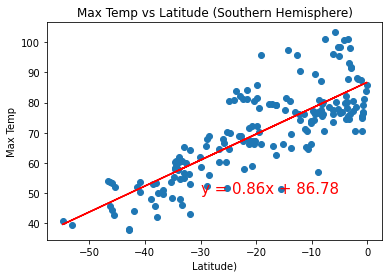

In [15]:
x1 = southernHemisphere["Latitude"]
y1 = southernHemisphere["Max Temperature"]


# Calculate correlation coefficient 
corCof = st.pearsonr(x1, y1)
print(f" The r-value is: {round(st.pearsonr(x1,y1)[0],4)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(-30,50), fontsize= 15, color = 'Red')
       
# Label graph
plt.xlabel('Latitude)')
plt.ylabel('Max Temp')
plt.title('Max Temp vs Latitude (Southern Hemisphere)')

# Save as Png 
plt.savefig("Images/LatitudevsTempSouthReg.png")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-value is: 0.112


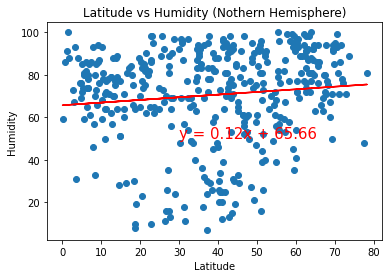

In [16]:
x1 = northernHemisphere["Latitude"]
y1 = northernHemisphere["Humidity"]

# Calculate correlation coefficient 
corCof = st.pearsonr(x1, y1)
print(f" The r-value is: {round(st.pearsonr(x1,y1)[0],4)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(30,50), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (Nothern Hemisphere)')


plt.savefig("Images/LatitudevsHumidityNorthReg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-value is: -0.14


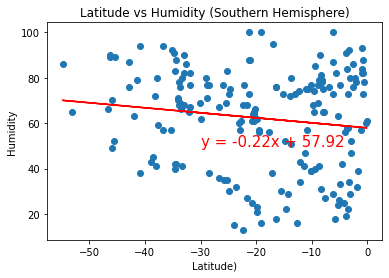

In [17]:
x1 = southernHemisphere["Latitude"]
y1 = southernHemisphere["Humidity"]

# Calculate correlation coefficient 
corCof = st.pearsonr(x1, y1)
print(f" The r-value is: {round(st.pearsonr(x1,y1)[0],2)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(-30,50), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Latitude)')
plt.ylabel('Humidity')
plt.title('Latitude vs Humidity (Southern Hemisphere)')

plt.savefig("Images/LatitudevsHumiditySouthReg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-value is: 0.0139


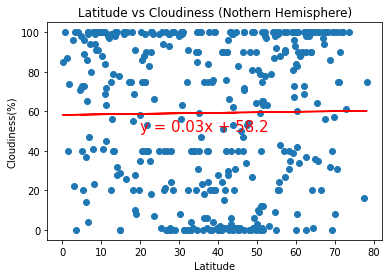

In [18]:
x1 = northernHemisphere["Latitude"]
y1 = northernHemisphere["Cloudiness"]

# Calculate correlation coefficient 
corCof = st.pearsonr(x1, y1)
print(f" The r-value is: {round(st.pearsonr(x1,y1)[0],4)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(20,50), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.title('Latitude vs Cloudiness (Nothern Hemisphere)')


plt.savefig("Images/LatitudevsCloudinessNorthReg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-value is: 0.1666


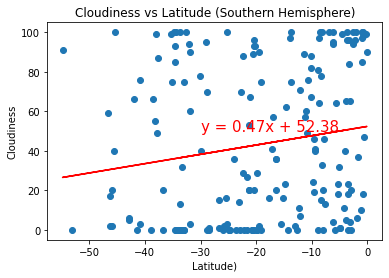

In [19]:
x1 = southernHemisphere["Latitude"]
y1 = southernHemisphere["Cloudiness"]


# Calculate correlation coefficient 
corCof = st.pearsonr(x1, y1)
print(f" The r-value is: {round(st.pearsonr(x1,y1)[0],4)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(-30,50), fontsize= 15, color = 'Red')
       
# Label graph
plt.xlabel('Latitude)')
plt.ylabel('Cloudiness')
plt.title('Cloudiness vs Latitude (Southern Hemisphere)')

plt.savefig("Images/LatitudevsCloudinessSouthReg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-value is: 0.0201


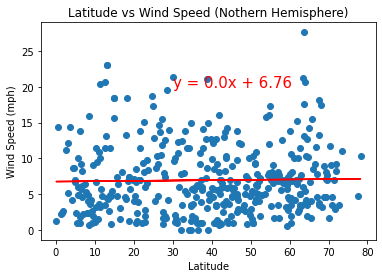

In [20]:
x1 = northernHemisphere["Latitude"]
y1 = northernHemisphere["Wind Speed"]

# Calculate correlation coefficient 
corCof = st.pearsonr(x1, y1)
print(f" The r-value is: {round(st.pearsonr(x1,y1)[0],4)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(30,20), fontsize= 15, color = 'Red')

# Label graph
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Latitude vs Wind Speed (Nothern Hemisphere)')


plt.savefig("Images/LatitudevsWindSpeedNorthReg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-value is: -0.1126


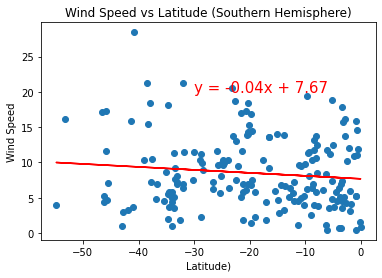

In [22]:
x1 = southernHemisphere["Latitude"]
y1 = southernHemisphere["Wind Speed"]


# Calculate correlation coefficient 
corCof = st.pearsonr(x1, y1)
print(f" The r-value is: {round(st.pearsonr(x1,y1)[0],4)}")

# Calculate linear regression line 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x1, y1)
regressValues = x1 * slope + intercept
lineEquation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plot scatter and linear regression 
plt.scatter(x1, y1)
plt.plot(x1, regressValues, 'r-')

# Label of lincear regression 
plt.annotate(lineEquation,(-30,20), fontsize= 15, color = 'Red')
       
# Label graph
plt.xlabel('Latitude)')
plt.ylabel('Wind Speed')
plt.title('Wind Speed vs Latitude (Southern Hemisphere)')

plt.savefig("Images/LatitudevsWindSpeedSouthReg.png")